In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('tableau-colorblind10')

In [3]:
df=pd.read_csv("C:\\Ai engineering\\udemy Ml\\internship\\datasets\\Advertising.csv")

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

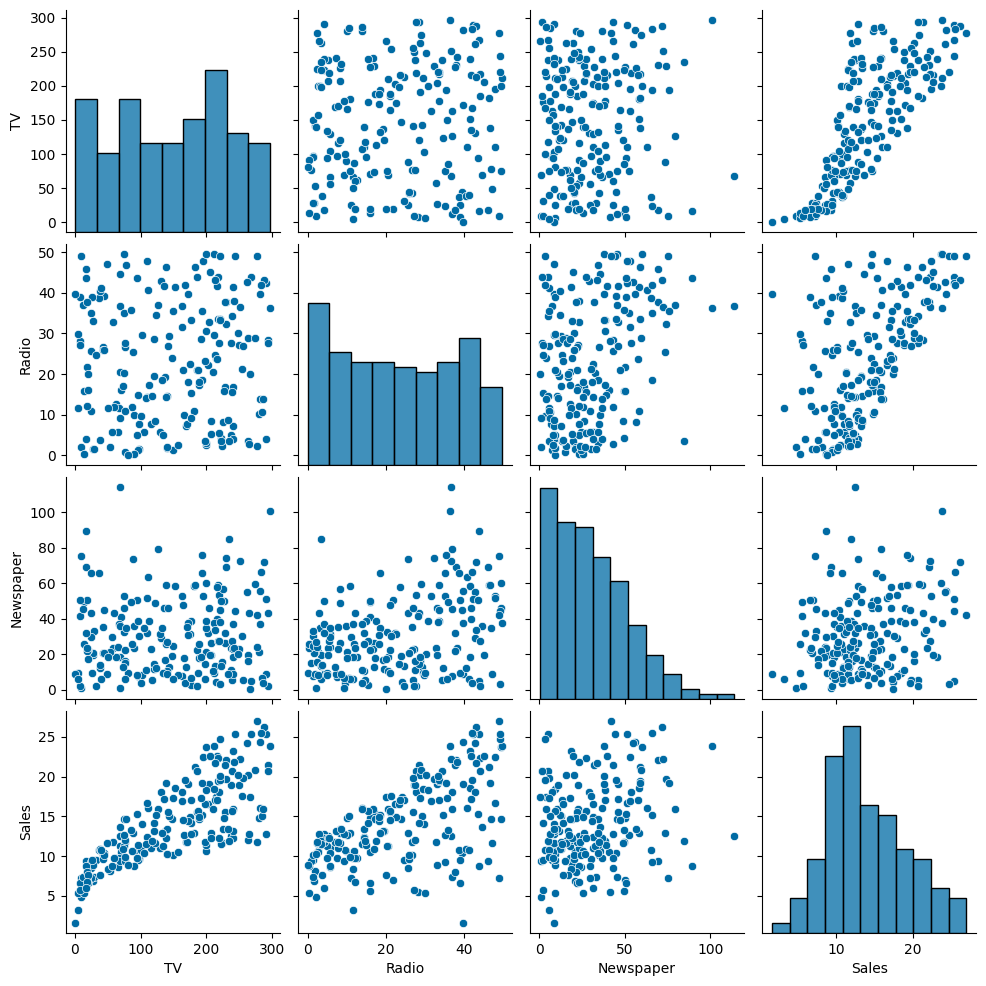

In [8]:
sns.pairplot(df)

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\Users\GVS\AppData\Local\Temp\ipykernel_5216\4256165467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

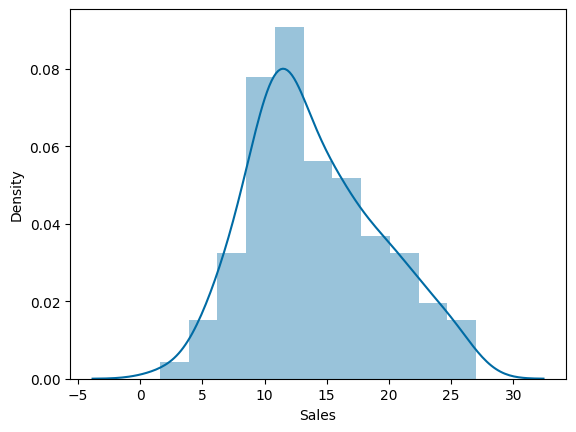

In [10]:
sns.distplot(df['Sales'])

In [11]:
X=df.drop(['Sales'],axis=1)
y=df['Sales']

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=124)

In [14]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_train=scale.fit_transform(X_train)

In [15]:
X_test=scale.transform(X_test)

In [18]:
## Importing Models

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression

li=LinearRegression(n_jobs=-1)
lasso=Lasso()
lassocv=LassoCV(cv=10)
ridge=Ridge()
ridgecv=RidgeCV(cv=10)
elastic=ElasticNet()
elasticcv=ElasticNetCV(cv=10)
random=RandomForestRegressor()
decision=DecisionTreeRegressor()
xgb=XGBRegressor()
models=[li,lasso,lassocv,ridge,ridgecv,elastic,elasticcv,random,decision,xgb]

In [19]:

def calculate(pred,real,X_test):
  from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
  print(10*'*')
  print("MSE:",mean_squared_error(real,pred))
  print("MAE:",mean_absolute_error(real,pred))
  print("RMSE:",root_mean_squared_error(real,pred))
  print("R2 Score:",r2_score(real,pred))
  score=r2_score(real,pred)
  adjust=1-((1-score)*(len(real)-1) / (len(real)-X_test.shape[1]-1))
  print("Adjusted R2 Score:",adjust)
  print(10*'*')
li.__class__
  

sklearn.linear_model._base.LinearRegression

In [20]:
def choose(models):
  for model in models:
    print(model.__class__)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    calculate(pred,y_test,X_test)
    
choose(models=models)

<class 'sklearn.linear_model._base.LinearRegression'>
**********
MSE: 2.983091276692053
MAE: 1.2801212388442516
RMSE: 1.727162782337569
R2 Score: 0.9086178131430552
Adjusted R2 Score: 0.9037223388471475
**********
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
**********
MSE: 5.01877280764228
MAE: 1.6705715487077517
RMSE: 2.240261772124472
R2 Score: 0.8462579948243855
Adjusted R2 Score: 0.8380218159756918
**********
<class 'sklearn.linear_model._coordinate_descent.LassoCV'>
**********
MSE: 2.8982126607385252
MAE: 1.2673826186699104
RMSE: 1.7024137748322308
R2 Score: 0.9112179325573782
Adjusted R2 Score: 0.906461750372952
**********
<class 'sklearn.linear_model._ridge.Ridge'>
**********
MSE: 2.9717414907300954
MAE: 1.280310922652798
RMSE: 1.7238739776242622
R2 Score: 0.908965495518605
Adjusted R2 Score: 0.9040886470642445
**********
<class 'sklearn.linear_model._ridge.RidgeCV'>
**********
MSE: 2.9717414907300954
MAE: 1.280310922652798
RMSE: 1.7238739776242622
R2 Score: 0.90896

### We will choose Random Forest Regressor

In [28]:
random.predict(scale.transform([[230,37,69]]))

c:\Ai engineering\udemy Ml\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([22.371])

In [29]:
import pickle

pickle.dump(random,open("Task5Model.pkl",'wb'))